In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_trial = "data/clinicaltrial_data.csv"
mouse_data_df= pd.read_csv(mouse_data)
mouse_data_df.head()
#clinical_trial_df=pd.read_csv(clinical_trial)
#clinical_trial_df.head()
# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset
#merged_df = clinical_trial.merge(mouse_data, on = "Mouse ID")
#merged_df.head()
# Display the data table for preview



,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
#To view clinical trial data
clinical_trial_df=pd.read_csv(clinical_trial)
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
merged_df = clinical_trial_df.merge(mouse_data_df, on = 'Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
#To comprehend basic treatment types and duration of treatments, information on mouse, drug types were recalled.
Mouse_groups = len(merged_df["Mouse ID"].unique())
Mouse_groups


249

In [5]:
Drugs_used = len(merged_df["Drug"].unique())
Drugs_used

10

In [6]:
Drug = merged_df["Drug"].unique()
Drug
                  

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [7]:
Treatment_time = merged_df["Timepoint"].unique()
Treatment_time

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [8]:
merged_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug                   object
dtype: object

## Tumor Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
tv_mean_df = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
#mean_tumor_volume = mean_tumor_volume.unstack(level = 0)
tv_mean_df.head()


 

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
tv_se_df = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'],)
tv_se_df = tv_se_df.rename(columns= {"Tumor Volume (mm3)": "Standard Error"})
tv_se_df = tv_se_df.unstack(level = 0)
tv_se_df


Standard Error                                                    \
Drug           Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                    
0               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5               0.448593  0.164505  0.235102  0.264819  0.202385  0.218091   
10              0.702684  0.236144  0.282346  0.357421  0.319415  0.402064   
15              0.838617  0.332053  0.357705  0.580268  0.444378  0.614461   
20              0.909731  0.359482  0.476210  0.726484  0.595260  0.839609   
25              0.881642  0.439356  0.550315  0.755413  0.813706  1.034872   
30              0.934460  0.490620  0.631061  0.934121  0.975496  1.218231   
35              1.052241  0.692248  0.984155  1.127867  1.013769  1.287481   
40              1.223608  0.708505  1.055220  1.158449  1.118567  1.370634   
45              1.223977  0.902358  1.144427  1.453186  1.416363  1.351726   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.231708  0.482955  0.239862  0.188950  
10         0.376195  0.720225  0.433678  0.263949  
15         0.466109  0.770432  0.493261  0.370544  
20         0.555181  0.786199  0.621889  0.533182  
25         0.577401  0.746991  0.741922  0.602513  
30         0.746045  0.864906  0.899548  0.800043  
35         1.084929  0.967433  1.003186  0.881426  
40         1.564779  1.128445  1.410435  0.998515  
45         1.888586  1.226805  1.576556  1.003576

In [11]:
# Minor Data Munging to Re-Format the Data Frames
tv_mean_df = tv_mean_df.unstack(level = 0)
#mean_tumor_volume.columns = mean_tumor_volume.columns.get_level_values(1)

# Preview that Reformatting worked
tv_mean_df

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [12]:
tumor_vol_plot_pre = tv_mean_df.unstack(0)
tumor_plot_df = tumor_vol_plot_pre["Tumor Volume (mm3)"]


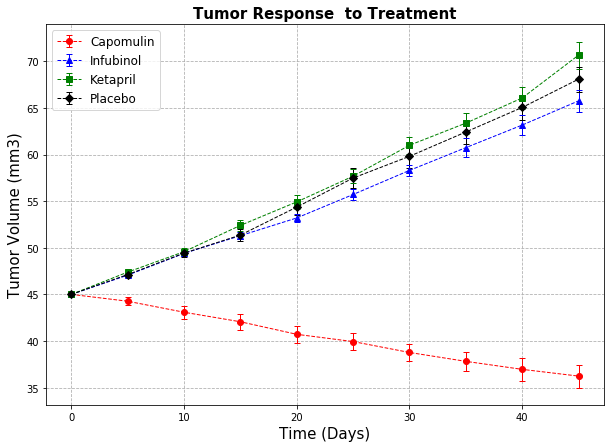

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate the Plot (with Error Bars)
#plot options
x_axis = np.arange(0, 50, 5)
x_limit=50
y_limit=(20,80)
plt.figure(figsize = (10,7))
error = tv_se_df["Standard Error"]["Capomulin"]
cap = plt.errorbar(x_axis, tumor_plot_df["Capomulin"], yerr=error, fmt="o", color= "red", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tv_se_df["Standard Error"]["Infubinol"]
infu = plt.errorbar(x_axis, tumor_plot_df["Infubinol"], yerr=error, fmt="^", color ="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tv_se_df["Standard Error"]["Ketapril"]
keta = plt.errorbar(x_axis, tumor_plot_df["Ketapril"], yerr=error, fmt="s",color= "green", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tv_se_df["Standard Error"]["Placebo"]
plac = plt.errorbar(x_axis, tumor_plot_df["Placebo"], yerr=error, fmt="D",color= "black", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.title('Tumor Response  to Treatment', fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Time (Days)', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

# Save the Figure
plt.savefig('Tumor Response to treatment.png')


## Metastatic Response to Treatment

In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_metastatic_sites_df = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
#mean_metastatic_sites_df = mean_metastatic_sites_df.unstack(level = 0)
# Preview DataFrame
mean_metastatic_sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_metastatic_sites_df = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])
se_MSS_df = se_metastatic_sites_df.rename(columns= {"Metastatic Sites": "Standard Error"})
se_MSS_df=se_MSS_df.unstack(level=0)
# Preview DataFrame
se_MSS_df

Standard Error                                                    \
Drug           Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                    
0               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5               0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10              0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15              0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20              0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25              0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30              0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35              0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40              0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45              0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

In [16]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_sites_df = mean_metastatic_sites_df.unstack(level = 0)
# Preview that Reformatting worked
mean_metastatic_sites_df

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [17]:
#Metastatic sites mean Data in  columns for the plot
MSS_plot_pre = mean_metastatic_sites_df.unstack(0)
MSS_plot_df = MSS_plot_pre["Metastatic Sites"]

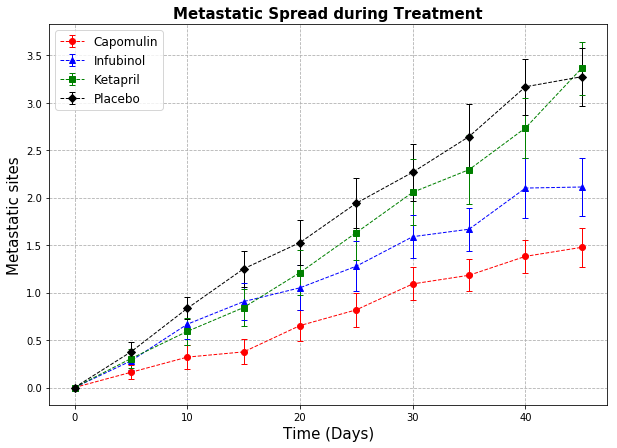

In [18]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)
x_limit=50
y_limit=(0,4)
plt.figure(figsize = (10,7))
error = se_MSS_df["Standard Error"]["Capomulin"]
cap = plt.errorbar(x_axis, MSS_plot_df["Capomulin"], yerr=error, fmt="o", color= "red", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = se_MSS_df["Standard Error"]["Infubinol"]
infu = plt.errorbar(x_axis, MSS_plot_df["Infubinol"], yerr=error, fmt="^", color ="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = se_MSS_df["Standard Error"]["Ketapril"]
keta = plt.errorbar(x_axis, MSS_plot_df["Ketapril"], yerr=error, fmt="s",color= "green", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = se_MSS_df["Standard Error"]["Placebo"]
plac = plt.errorbar(x_axis, MSS_plot_df["Placebo"], yerr=error, fmt="D",color= "black", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.title('Metastatic Spread during Treatment', fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Time (Days)', fontdict = {'fontsize': 15})
plt.ylabel('Metastatic sites', fontdict = {'fontsize': 15})

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)


# Save the Figure
plt.savefig('Metastatic sites.png')

# Show the Figure
plt.show()

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_df = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID'])
mice_count_df = mice_count_df.rename(columns={"Mouse ID": "Mouse Count"})
#mice_count = mice_count.unstack(level = 0)
# Convert to DataFrame

# Preview DataFrame
mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [20]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.unstack(level = 0)
mice_count_df = mice_count_df.rename(columns={"Mouse ID": "Mouse Count"})
# Preview the Data Frame
mice_count_df

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [21]:
#mouse survived_Data in  columns for the plot

mice_plot_live = mice_count_df.unstack(0)
mice_df = mice_plot_live["Mouse Count"]


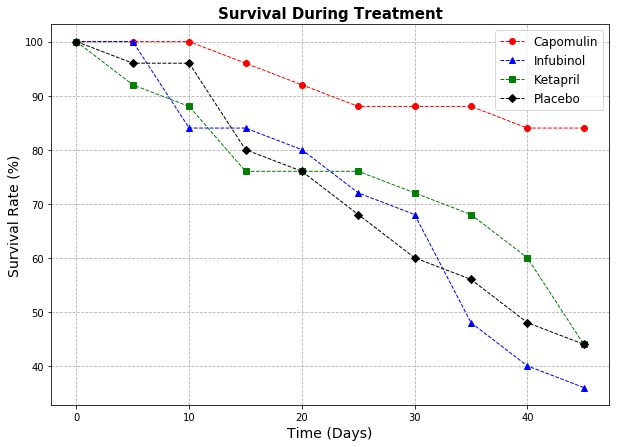

In [22]:
# Generate the Plot (Accounting for percentages)

x_axis = np.arange(0, 50, 5)
x_limit=(0,50)
y_limit=(20,100)


plt.figure(figsize=(10,7))

cap3 = plt.errorbar(x_axis, (mice_df["Capomulin"]/25*100), fmt="o",color ="red", ls="dashed", linewidth=1, alpha=1, capsize=3)
infu3 = plt.errorbar(x_axis, (mice_df["Infubinol"]/25*100), fmt="^", color = "blue", ls="dashed", linewidth=1, alpha=1, capsize=3)
keta3 = plt.errorbar(x_axis, (mice_df["Ketapril"]/25*100),  fmt="s",color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)
plac3 = plt.errorbar(x_axis, (mice_df["Placebo"]/25*100),  fmt="D", color= "black", ls="dashed", linewidth=1, alpha=1, capsize=3)



plt.title("Survival During Treatment", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12, loc="best")


# Save the Figure
plt.savefig('Survival Rate with treatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [23]:
# Calculate the percent changes in tumor size for each drug
tumor_change = (tv_mean_df.loc[45, :] - tv_mean_df.loc[0, :])/tv_mean_df.loc[0, :] * 100
tumor_change



                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

In [24]:
percent_change_df = pd.DataFrame(tumor_change, columns=['Percent Tumor Change'])
percent_change_df

Percent Tumor Change
                   Drug                           
Tumor Volume (mm3) Capomulin            -19.475303
                   Ceftamin              42.516492
                   Infubinol             46.123472
                   Ketapril              57.028795
                   Naftisol              53.923347
                   Placebo               51.297960
                   Propriva              47.241175
                   Ramicane             -22.320900
                   Stelasyn              52.085134
                   Zoniferol             46.579751

In [25]:

percent_change_df['Tumor Reduction'] = percent_change_df['Percent Tumor Change'] < 0

# Display the updated df
percent_change_df

Percent Tumor Change  Tumor Reduction
                   Drug                                            
Tumor Volume (mm3) Capomulin            -19.475303             True
                   Ceftamin              42.516492            False
                   Infubinol             46.123472            False
                   Ketapril              57.028795            False
                   Naftisol              53.923347            False
                   Placebo               51.297960            False
                   Propriva              47.241175            False
                   Ramicane             -22.320900             True
                   Stelasyn              52.085134            False
                   Zoniferol             46.579751            False

In [26]:
# Create a list of colors based on the values in 'Tumor Reduction?' col
# If the value in the col is True, the tumor decreased, therefore the associated color is green
# If the value in the col is False, the tumor increased, therefore the associated color is red
colors = []
for x in range(len(percent_change_df['Tumor Reduction'])):
    if percent_change_df['Tumor Reduction'][x] == True:
        colors.append('green')
    else:
        colors.append('red')
print(colors)

['green', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'red', 'red']


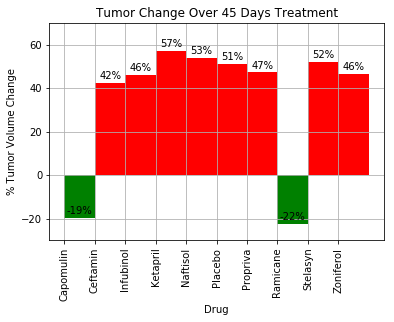

In [27]:
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
rects1 = ax.bar(percent_change_df.index.get_level_values('Drug'), percent_change_df['Percent Tumor Change'], align='edge', width=1, color=colors)
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Days Treatment")
plt.grid()
plt.xticks(rotation='vertical')
plt.ylim(-30,70)

# Use functions to label the percentages of changes
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position, f'{int(height)}%', ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(rects1, ax)

# Save the Figure
plt.savefig('Tumor Change.png')

# Show the Figure
plt.show()